# Image Segmentation using k-Means

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [32]:
img = cv2.imread(r"C:/Users/anupa/Downloads/Download.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)

(600, 800, 3)


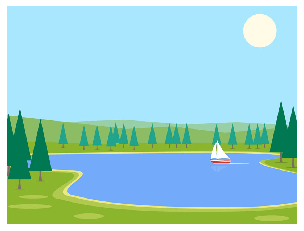

In [33]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [36]:
all_pixels = img.reshape((600*800,3))
print(all_pixels.shape)

(480000, 3)


In [37]:
from sklearn.cluster import KMeans

In [38]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
centres = km.cluster_centers_
centres = np.array(centres,dtype = 'uint8')
print(centres)

[[171 230 250]
 [148 186  67]
 [ 14 135 101]
 [115 170 249]]


## Plotting colors

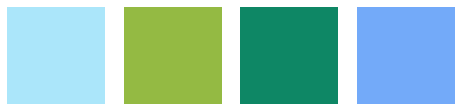

In [40]:
i = 1
plt.figure(0,figsize=(8,4))
colors = []
for each_col in centres:
    plt.subplot(1,4,i)
    i += 1
    colors.append(each_col)
    
    # Color swatch
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    plt.axis('off')
    
plt.show()

## Segmenting our image

In [41]:
new_img = np.zeros((600*800,3),dtype='uint8') 
print(new_img.shape)

(480000, 3)


In [42]:
colors

[array([171, 230, 250], dtype=uint8),
 array([148, 186,  67], dtype=uint8),
 array([ 14, 135, 101], dtype=uint8),
 array([115, 170, 249], dtype=uint8)]

In [43]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

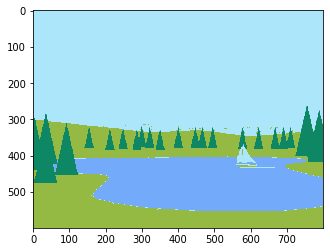

In [44]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
    
new_img = new_img.reshape(img.shape)
plt.imshow(new_img)
plt.show()